<a href="https://colab.research.google.com/github/matiasfeliu92/Transacciones_Sube/blob/refactor-ETL/Transacciones_SUBE_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install python-decouple
# !python -m pip install --upgrade 'sqlalchemy<2.0'

In [ ]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine, text, text as sql_text
import os
import plotly.express as px
from decouple import config
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving .env to .env (12)


In [ ]:
sns.set(style="whitegrid")

In [ ]:
database_url = str(config('DATABASE_URL')) or str(os.getenv('DATABASE_URL'))
engine = create_engine(database_url)

query = """
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = 'public'
"""

In [ ]:
df_tables = pd.read_sql_query(con=engine.connect(),
                                  sql=sql_text(query))
df_tables = df_tables[df_tables['table_name'].str.contains('SUBE')]
df_tables

,table_name
2,Transacciones_SUBE_2022
3,Transacciones_SUBE_2023
4,Transacciones_SUBE_2021
5,Transacciones_SUBE_2020


In [ ]:
df_Transacciones_SUBE = pd.DataFrame()
for table in df_tables['table_name']:
    print(table)
    df = pd.read_sql_query(sql=sql_text(f'SELECT * FROM "public"."{table}"'), con=engine.connect())
    df_Transacciones_SUBE = pd.concat([df_Transacciones_SUBE, df], ignore_index=True)
engine.dispose()

Transacciones_SUBE_2022
Transacciones_SUBE_2023
Transacciones_SUBE_2021
Transacciones_SUBE_2020


In [ ]:
df_Transacciones_SUBE.head()

,Fecha Viaje,Nombre Empresa,Linea,Amba,Tipo Transporte,Jurisdiccion,Provincia,Municipio,Cantidad,Dato Preliminar,Anio,Mes,Periodo
0,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,10,NO,2022,01,2022-01
1,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,19,NO,2022,01,2022-01
2,2022-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO,2022,01,2022-01
3,2022-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,675,NO,2022,01,2022-01
4,2022-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO,2022,01,2022-01


In [ ]:
df_Transacciones_SUBE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582145 entries, 0 to 1582144
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Fecha Viaje      1582145 non-null  object
 1   Nombre Empresa   1582145 non-null  object
 2   Linea            1582145 non-null  object
 3   Amba             1582145 non-null  object
 4   Tipo Transporte  1582145 non-null  object
 5   Jurisdiccion     1571983 non-null  object
 6   Provincia        1571983 non-null  object
 7   Municipio        1571983 non-null  object
 8   Cantidad         1582145 non-null  int64 
 9   Dato Preliminar  1582145 non-null  object
 10  Anio             1582145 non-null  object
 11  Mes              1582145 non-null  object
 12  Periodo          1582145 non-null  object
dtypes: int64(1), object(12)
memory usage: 156.9+ MB


In [ ]:
df_Transacciones_SUBE.isnull().sum()

Fecha Viaje            0
Nombre Empresa         0
Linea                  0
Amba                   0
Tipo Transporte        0
Jurisdiccion       10162
Provincia          10162
Municipio          10162
Cantidad               0
Dato Preliminar        0
Anio                   0
Mes                    0
Periodo                0
dtype: int64

¿En que mes y año se registro la mayor cantidad de transacciones de SUBE?

In [ ]:
df_Transacciones_SUBE_periodo = df_Transacciones_SUBE.groupby(['Anio', 'Mes'])['Cantidad'].size().reset_index(name='Count').sort_values('Count', ascending=False)
df_Transacciones_SUBE_periodo.head(10)

,Anio,Mes,Count
43,2023,08,41327
38,2023,03,40524
40,2023,05,40349
42,2023,07,39643
41,2023,06,39054
39,2023,04,38801
31,2022,08,38214
26,2022,03,38093
35,2022,12,37611
44,2023,09,37477


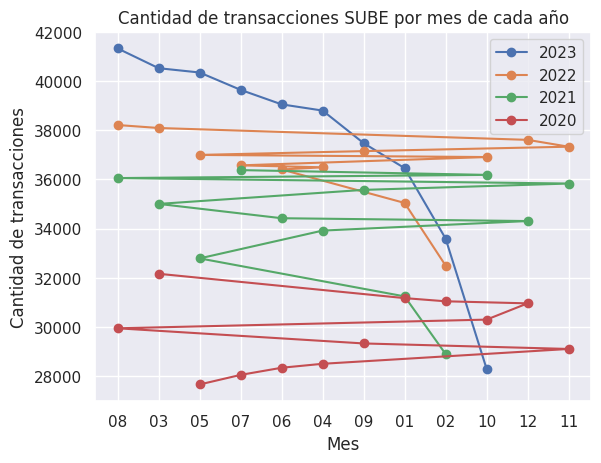

In [ ]:
## MATPLOTLIB
for anio in df_Transacciones_SUBE_periodo['Anio'].unique():
  df_por_mes = df_Transacciones_SUBE_periodo[df_Transacciones_SUBE_periodo['Anio'] == anio]
  plt.plot(df_por_mes['Mes'], df_por_mes['Count'], marker='o', label=anio)

plt.xlabel('Mes')
plt.ylabel('Cantidad de transacciones')
plt.title('Cantidad de transacciones SUBE por mes de cada año')
plt.legend()
plt.show()

## PLOTLY
# fig = px.line(df_Transacciones_SUBE_periodo, x='Mes', y='Count', color='Anio',
#               labels={'Mes': 'Mes', 'count': 'Cantidad de Viajes', 'Anio': 'Año'},
#               title='Cantidad de transacciones SUBE por mes de cada año')

# fig.show()

¿En que año se registro la mayor cantidad de transacciones de SUBE?

In [ ]:
df_Transacciones_SUBE_por_anio = df_Transacciones_SUBE.groupby('Anio').size().reset_index(name='count')
df_Transacciones_SUBE_por_anio

,Anio,count
0,2020,356628
1,2021,410644
2,2022,439337
3,2023,375536


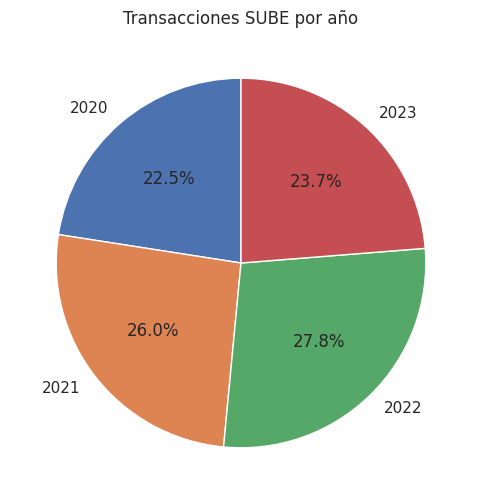

In [ ]:
## PLOTLY
# fig = px.pie(df_Transacciones_SUBE_por_anio, values='count', names='Anio', title='Transacciones SUBE por año')
# fig.show()

## MATPLOTLIB
valores = df_Transacciones_SUBE_por_anio['count']
nombres = df_Transacciones_SUBE_por_anio['Anio']

sns.set()

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=nombres, autopct='%1.1f%%', startangle=90)
plt.title('Transacciones SUBE por año')

plt.show()

¿Cual es el promedio de transacciones por mes?

In [ ]:
df_promedio_transacciones_mes = df_Transacciones_SUBE.groupby(['Anio', 'Mes'])['Cantidad'].mean().reset_index()
df_promedio_transacciones_mes.head(10)

,Anio,Mes,Cantidad
0,2020,01,10063.643006
1,2020,02,9857.941027
2,2020,03,6910.860163
3,2020,04,2076.256428
4,2020,05,2810.344128
5,2020,06,2963.137515
6,2020,07,2692.977117
7,2020,08,3076.778731
8,2020,09,3603.716370
9,2020,10,4226.547768


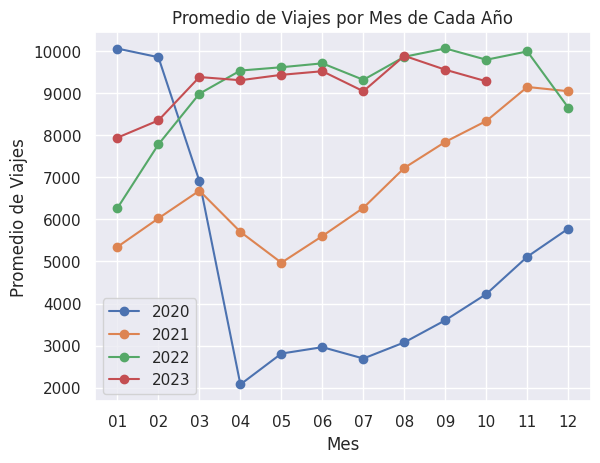

In [ ]:
## MATPLOTLIB
for anio in df_promedio_transacciones_mes['Anio'].unique():
  df_por_anio = df_promedio_transacciones_mes[df_promedio_transacciones_mes['Anio'] == anio]
  plt.plot(df_por_anio['Mes'], df_por_anio['Cantidad'], marker='o', label=anio)

plt.xlabel('Mes')
plt.ylabel('Promedio de Viajes')
plt.title('Promedio de Viajes por Mes de Cada Año')
plt.legend()
plt.show()

## PLOTLY
# fig = px.line(df_promedio_transacciones_mes, x='Mes', y='Cantidad', color='Anio',
#               labels={'Mes': 'Mes', 'Cantidad': 'Promedio de Viajes', 'Anio': 'Año'},
#               title='Promedio de transacciones por mes de cada año')

# fig.show()